In [8]:
!pip uninstall numpy

^C


In [9]:
!pip install numpy 


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\mgsal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
!pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\mgsal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install -U imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\mgsal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
!pip install catboost


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\mgsal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/9f/1f/a1fc89e48706b20a22b60f3a62b5bdbe7d8bc7dcd8353abcebe66a2bee21/catboost-1.2.2-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ----------------- ---------------------- 20.5/47.0 kB ? eta -:--:--
     ----------------- ---------------------- 20.5/47.0 kB ? eta -:--:--
     -------------------------------------- 47.0/47.0 kB 294.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.0 MB 1.3 MB/s eta 0:01:19
   ---------------------------------------- 0.0/101.0 MB 1.3 MB/s eta 0:01:19
   ---------------------------------------- 0.0/101.0 MB 1.3 MB/s eta 0:01:19
   ---------------------------------------- 0.0/101.0 MB 1.3 MB/s eta 0:01:19
   ---------------------------------------- 0.0/101.0 MB 1.3 MB/s eta 0:01:19
   ----------------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\mgsal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from imblearn.over_sampling import KMeansSMOTE, SMOTE,SVMSMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import time
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import model_selection


## Знакомство с данными, обработка пропусков и выбросов (Cleaning Data)


In [7]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Данные о пациентах:
1. Пол
2. Возраст
3. Гипертония (наличие/отсутствие)
4. Болезнь сердца (наличие/отсутсвие)
5. Курение 
6. Индекс массы тела
7. HbA1c level - гликированный гемоглобин
8. Уровень глюкозы
9. Диабет (наличие/отсутвие) - целевая переменная.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
df.shape

(100000, 9)

In [ ]:
#поиск дубликатов

df.duplicated().sum()

3854

In [ ]:
#удаление дубликатов

df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.describe(include= 'object')

,gender,smoking_history
count,96146,96146
unique,3,6
top,Female,never
freq,56161,34398


In [ ]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

Признак "Пол", помимо мужского и женского, включает в себя категорию "other" в небольшом количестве = 18. Думаю этот признак можно удалить, без риска потери информативности данных.

In [ ]:
df = df[df['gender'] != 'Other']

In [ ]:
df.shape

(96128, 9)

In [ ]:
df['smoking_history'].value_counts()

smoking_history
never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: count, dtype: int64

In [ ]:
df[df['smoking_history'] == 'No Info'].shape[0] / df.shape[0] *100

34.2054344207723

Признак 'smoking_history' включает в себя разные по иерархии категории: 

-No Info ("нет информации" - составляет 34% данных), 

-never (никогда), 

-former (бывший), 

-current (курит в настоящее время), 

-not current (не курит в настоящее время) - возможно тоже бывший курильщик.

-ever (когда-либо курил). 

Поскольку данный признак содержит больше 30% неинформатиных данных, а также другие не полностью логически связанные между собой категории, лучше его удалить.

In [ ]:
df = df.drop(columns = ['smoking_history'])

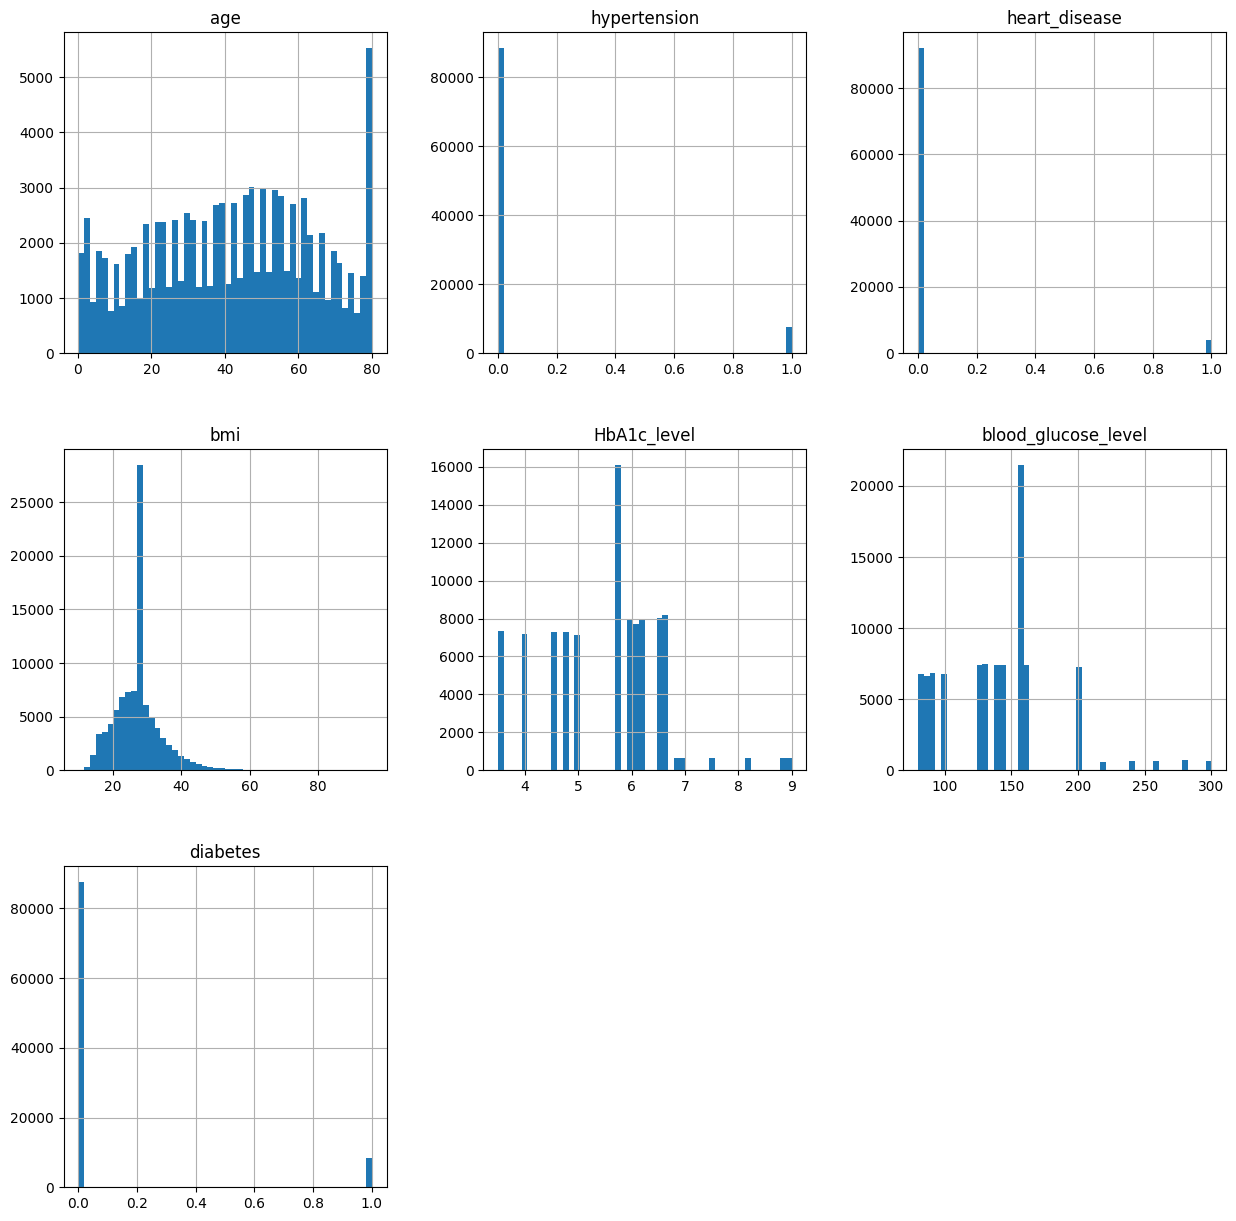

In [ ]:
#распределение признаков 

df.hist(bins=50, figsize=(15, 15))
plt.show()

Визуально все значения признаков правдоподобны, включая экстремально высокие значения индекса массы тела и уровня глюкозы крови. Проверяла данных признаки на выбросы по методу Тьюки, находит несколь тысяч выбросов, исключая как раз те самые высокие цифры. Однако, учитывая то, что такие значения дейтсвительно  встречаются у пациентов, решила рассмотреть их подробнее.

Посмотрим пациентов с уровнем глкозы крови больше 250 mg/dL. Во-первых, у всех есть диабет, во-вторых индекс массы тела в большинстве случаев соответсвует избыточной массе тела и ожирению, в-третьих возраст преимущественно старше 50 лет. Соответственно, данные логичны и не подлежат исключению.

In [ ]:
df[df['blood_glucose_level'] >= 250].head(30)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
38,Male,50.0,1,0,27.32,5.7,260,1
94,Female,60.0,0,0,27.32,7.5,300,1
104,Female,80.0,1,0,27.32,6.8,280,1
125,Female,77.0,0,0,31.70,6.5,280,1
142,Female,80.0,0,0,21.97,7.0,300,1
146,Male,53.0,0,0,30.80,6.6,280,1
199,Female,43.0,0,0,26.71,6.5,300,1
361,Male,80.0,0,1,24.36,7.5,280,1
414,Female,68.0,0,0,40.31,7.5,260,1
518,Female,67.0,0,0,32.31,7.0,280,1


Что касается значений индекса массы тела, здесь сомнительно. С одной стороны с учетом возрастающей проблемы ожирения, такие индексы массы тела возможны, с другой стороны встречаются значение >80 у детей 7 лет и пожилых 80 лет, что маловероятно и, скорее всего, это выбросы. Поскольку строк с индексом массы тела > 60 немного относительно всего датасета (0,12%), удаляю их.

In [ ]:
df[df['bmi'] >= 60]

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
59,Female,67.0,0,0,63.48,8.8,155,1
562,Male,43.0,0,0,69.37,7.5,130,1
618,Female,59.0,0,1,60.26,8.8,145,1
1395,Female,60.0,1,0,60.20,7.0,200,1
2072,Male,18.0,0,0,65.93,6.0,200,0
...,...,...,...,...,...,...,...,...
96066,Male,80.0,0,0,88.76,6.2,140,0
96673,Female,38.0,0,0,64.26,6.2,100,0
96771,Female,25.0,0,0,64.27,4.5,126,0
97217,Female,71.0,0,0,64.80,9.0,280,1


In [ ]:
df[df['bmi'] >= 60].shape[0] / df.shape[0] *100

0.12067243675099866

In [ ]:
df = df[df['bmi'] <= 60]

In [ ]:
df.shape

(96013, 8)

## Разведывательный анализ и визуализация 
## (Exploratory Data Analysis and Visualisation)


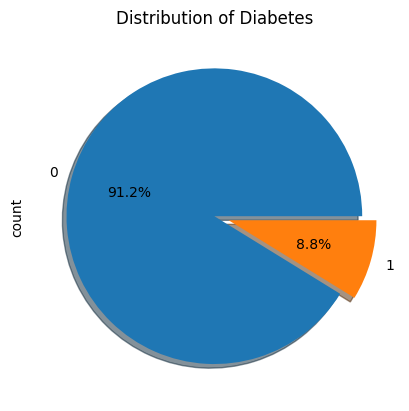

In [ ]:
#Доля пациентов с диабетом

df.diabetes.value_counts().plot(kind = 'pie', autopct = '%1.1f%%',explode = [0, 0.1], shadow = True)
plt.title('Distribution of Diabetes')
plt.show()

Доля пациентов с диабетом 8,8% (классы не сбалансированы)

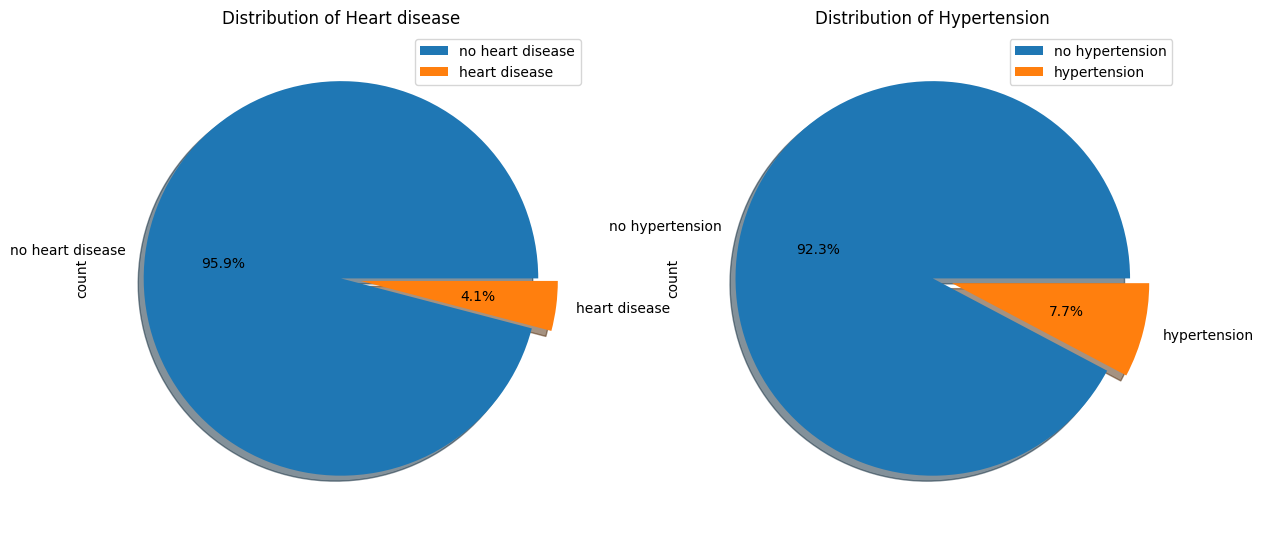

In [ ]:
#Доля пациентов с заболеваниями сердца и гипертонией

plt.figure(figsize = [14,8]);

plt.subplot(1,2,1);
df.heart_disease.value_counts().plot(kind = 'pie', autopct = '%1.1f%%',explode = [0, 0.1], shadow = True, labels = ['no heart disease', 'heart disease'])
plt.title('Distribution of Heart disease')
plt.legend()

plt.subplot(1, 2, 2);
df.hypertension.value_counts().plot(kind = 'pie', autopct = '%1.1f%%',explode = [0, 0.1], shadow = True, labels = ['no hypertension', 'hypertension'])
plt.title('Distribution of Hypertension')
plt.legend()

plt.show()

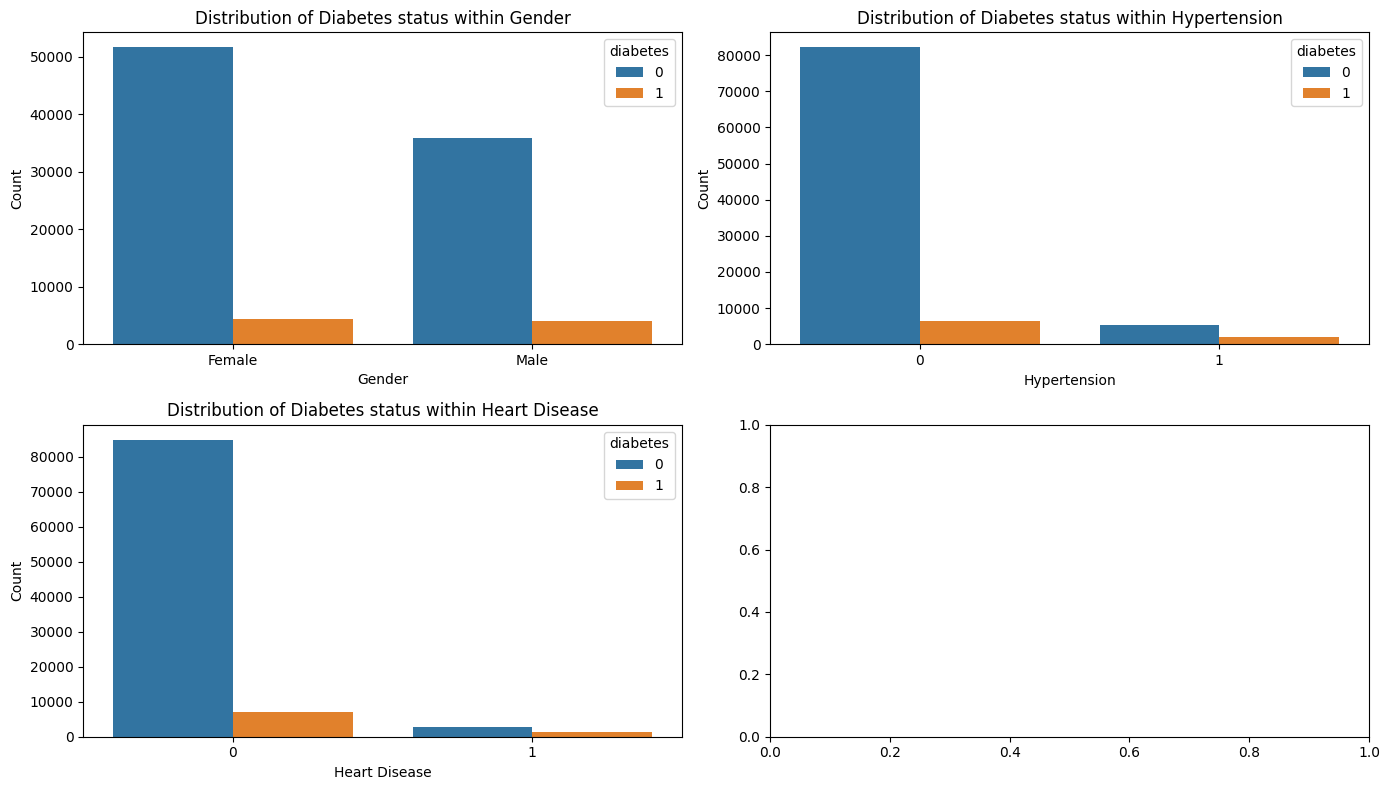

In [ ]:
# оценка распределения целевого признаки в зависимости от категориальных признаков
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

# 1. Распределение в завимости от признака пола
sns.countplot(x="gender", data=df,hue = 'diabetes',ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Diabetes status within Gender")
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Count")

# 1. Распределение в завимости от наличия гипертензии
sns.countplot(x="hypertension", data=df, hue = 'diabetes', ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Diabetes status within Hypertension")
axes[0, 1].set_xlabel("Hypertension")
axes[0, 1].set_ylabel("Count")

# 1. Распределение в завимости от наличия болезни сердца
sns.countplot(x="heart_disease", hue = 'diabetes',data=df, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Diabetes status within Heart Disease")
axes[1, 0].set_xlabel("Heart Disease")
axes[1, 0].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [ ]:
# Расчет доли больных диабетом в каждой категории (Calculate the percentage of diabetes status within each category)
gender_percentages = df.groupby('gender')['diabetes'].mean() * 100
print('Gender percentages', round(gender_percentages))
hypertension_percentages = df.groupby('hypertension')['diabetes'].mean() * 100
print('Hypertension percentages', round(hypertension_percentages))
heart_disease_percentages = df.groupby('heart_disease')['diabetes'].mean() * 100
print('Heart disease percentages', round(heart_disease_percentages))

Gender percentages gender
Female     8.0
Male      10.0
Name: diabetes, dtype: float64
Hypertension percentages hypertension
0     7.0
1    28.0
Name: diabetes, dtype: float64
Heart disease percentages heart_disease
0     8.0
1    32.0
Name: diabetes, dtype: float64


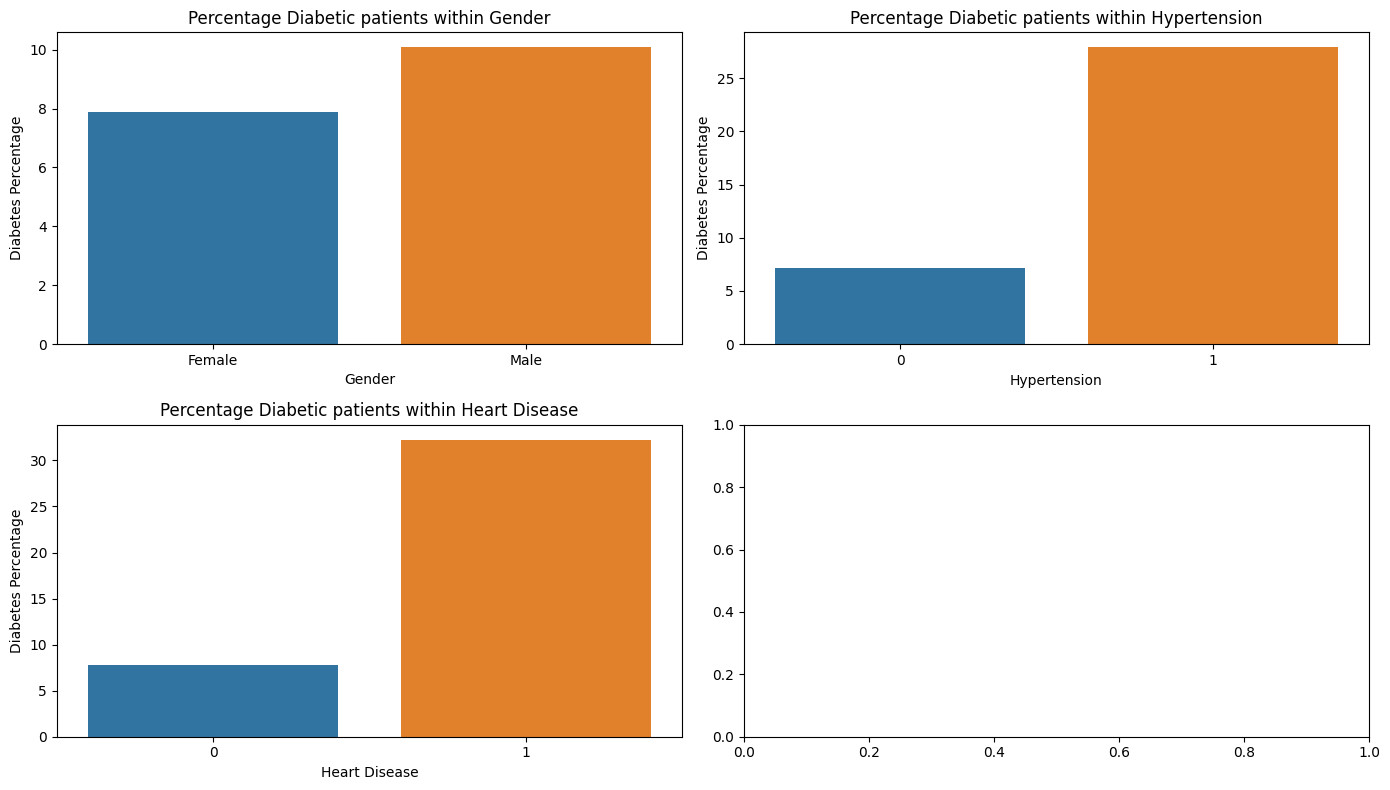

In [ ]:
# визиализация соотношения признаков пациентов с установленным диагнозом диабета
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

# 1. Распределение в зависимости от пола
sns.barplot(x=gender_percentages.index, y=gender_percentages.values, ax=axes[0, 0])
axes[0, 0].set_title("Percentage Diabetic patients within Gender")
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Diabetes Percentage")

# 2. Распределение в зависимости от гипертонического статуса
sns.barplot(x=hypertension_percentages.index, y=hypertension_percentages.values, ax=axes[0, 1])
axes[0, 1].set_title("Percentage Diabetic patients within Hypertension")
axes[0, 1].set_xlabel("Hypertension")
axes[0, 1].set_ylabel("Diabetes Percentage")

# 31. Распределение в зависимости от наличия/отсутсвия поражения сердца
sns.barplot(x=heart_disease_percentages.index, y=heart_disease_percentages.values, ax=axes[1, 0])
axes[1, 0].set_title("Percentage Diabetic patients within Heart Disease")
axes[1, 0].set_xlabel("Heart Disease")
axes[1, 0].set_ylabel("Diabetes Percentage")

plt.tight_layout()
plt.show()

Выводы по распределению признаков у больных диабетом:
1. Доля мужчин превышает долю женщин на 2%
2. Доля больных гипертонией выше на 21% по сравнению с группой без данного диагноза
3. Доля больных заболеваниями сердца превышает на 26% долю без данного заболевания

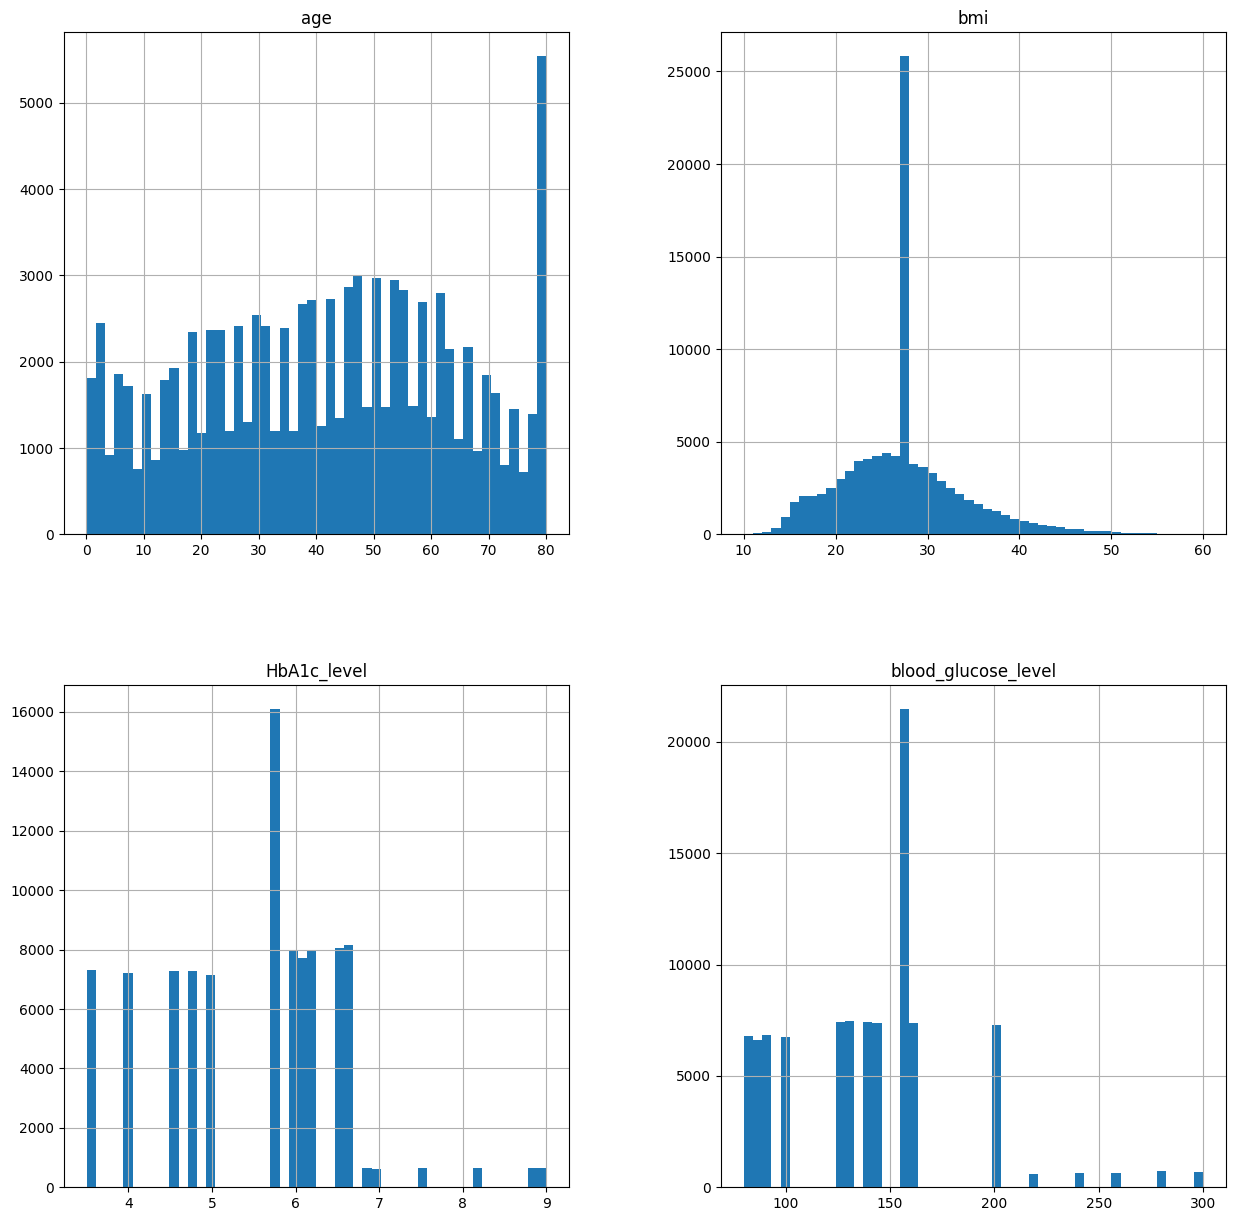

In [ ]:
#Распределение числовых признаков
df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].hist(bins=50, figsize=(15, 15))
plt.show()

In [ ]:
# в каждой группе присутвует значение в значительно большем количестве, чем остальные:
print('Mode of Age', df['age'].mode())
print('Mode of BMI', df['bmi'].mode())
print('Mode of HbA1c level', df['HbA1c_level'].mode())
print('Mode of Blood glucoselevel', df['blood_glucose_level'].mode())


Mode of Age 0    80.0
Name: age, dtype: float64
Mode of BMI 0    27.32
Name: bmi, dtype: float64
Mode of HbA1c level 0    6.6
Name: HbA1c_level, dtype: float64
Mode of Blood glucoselevel 0    159
Name: blood_glucose_level, dtype: int64


Выводы:
1. Возраст пациентов в датасете от 0 до 80, с небольшим увеличение в группе 40-60 лет и резким увеличением в группе 80 лет
2. Индекс массы тела от 10 до 60, с пиком в интервале от 20 до 30 и модой 27,32
3. Уровень гликированного гемоглобина от 3,5 до 9, мода 6.6. Значений выше 6,8 значительно меньше.
4. Уровень глюкозы крови от 80 до 300, мода = 159, значение выше 220 значительно меньше.

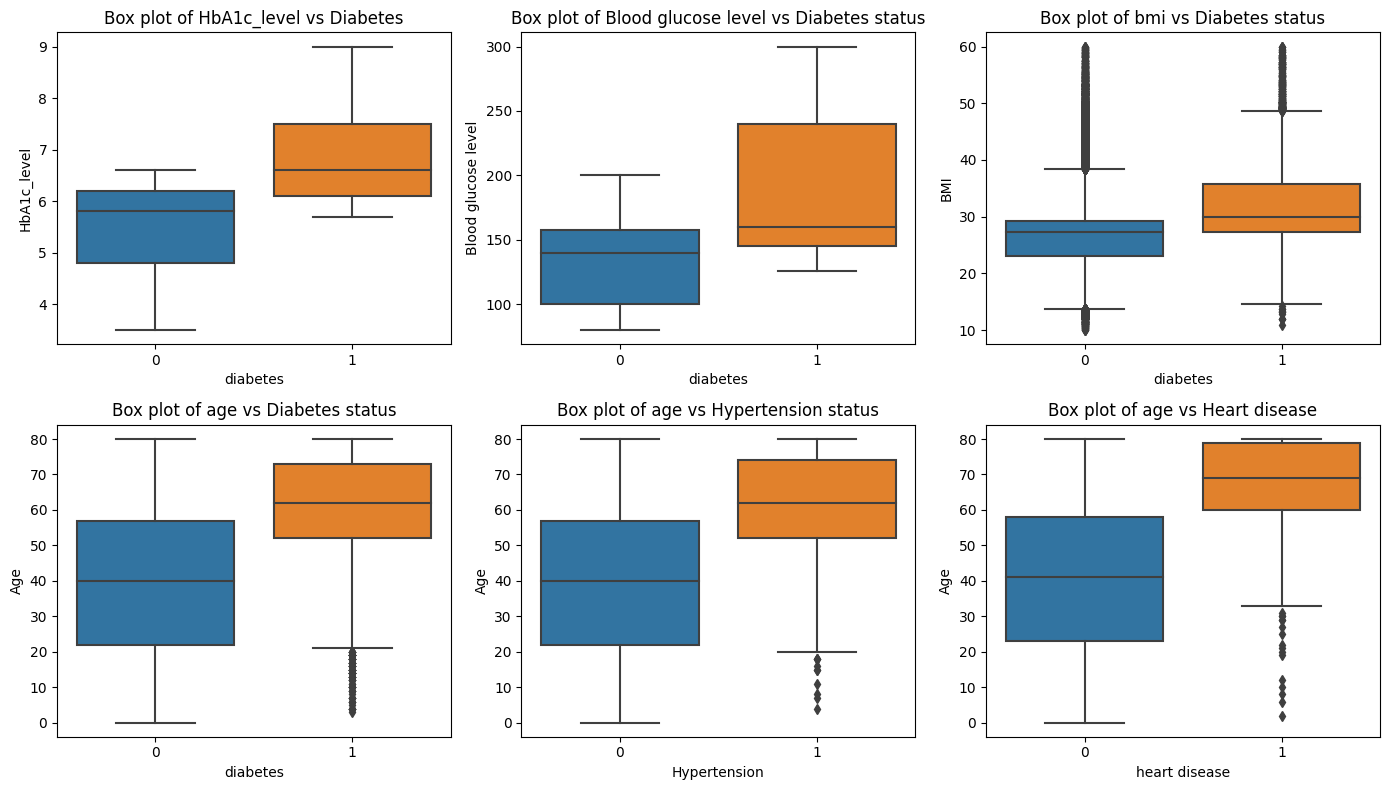

In [ ]:
#распределение числовых признаков у пациентов с подтверджденным диагнозом сахарного диабета

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

# HbA1c_level и Diabetes
sns.boxplot(x = 'diabetes', y = 'HbA1c_level', data = df,ax=axes[0, 0])
ax=axes[0, 0].set_title('Box plot of HbA1c_level vs Diabetes')
ax=axes[0, 0].set_xlabel('diabetes')
ax=axes[0, 0].set_ylabel('HbA1c_level')


# Blood glucose и Diabetes
sns.boxplot(x = 'diabetes', y = 'blood_glucose_level', data = df,ax=axes[0, 1])
ax=axes[0, 1].set_title('Box plot of Blood glucose level vs Diabetes status')
ax=axes[0, 1].set_xlabel('diabetes')
ax=axes[0, 1].set_ylabel('Blood glucose level')


# BMI и Diabetes
sns.boxplot(x = 'diabetes', y = 'bmi', data = df, ax=axes[0, 2])
ax=axes[0, 2].set_title('Box plot of bmi vs Diabetes status')
ax=axes[0, 2].set_xlabel('diabetes')
ax=axes[0, 2].set_ylabel('BMI')


# age и Diabetes
sns.boxplot(x = 'diabetes', y = 'age', data = df, ax=axes[1, 0])
ax=axes[1, 0].set_title('Box plot of age vs Diabetes status')
ax=axes[1, 0].set_xlabel('diabetes')
ax=axes[1, 0].set_ylabel('Age')


# age и hypertension
sns.boxplot(x = 'hypertension', y = 'age', data = df, ax=axes[1, 1])
ax=axes[1, 1].set_title('Box plot of age vs Hypertension status')
ax=axes[1, 1].set_xlabel('Hypertension')
ax=axes[1, 1].set_ylabel('Age')


# age и heart disease
sns.boxplot(x = 'heart_disease', y = 'age', data = df, ax=axes[1, 2])
ax=axes[1, 2].set_title('Box plot of age vs Heart disease')
ax=axes[1, 2].set_xlabel('heart disease')
ax=axes[1, 2].set_ylabel('Age')

plt.tight_layout()
plt.show()

1. У пациентов с сахарным диабетом наблюдаются более высокие значения уровня глюкозы крови, гликированного гемоглобина, ИМТ и возраста.
2. За редкими исключениям, люди старше 20 лет больше подвержены сахарному диабету, гипертонии и болезням сердца, максимальное количество пациентов достигается в возрасте старше 50 лет


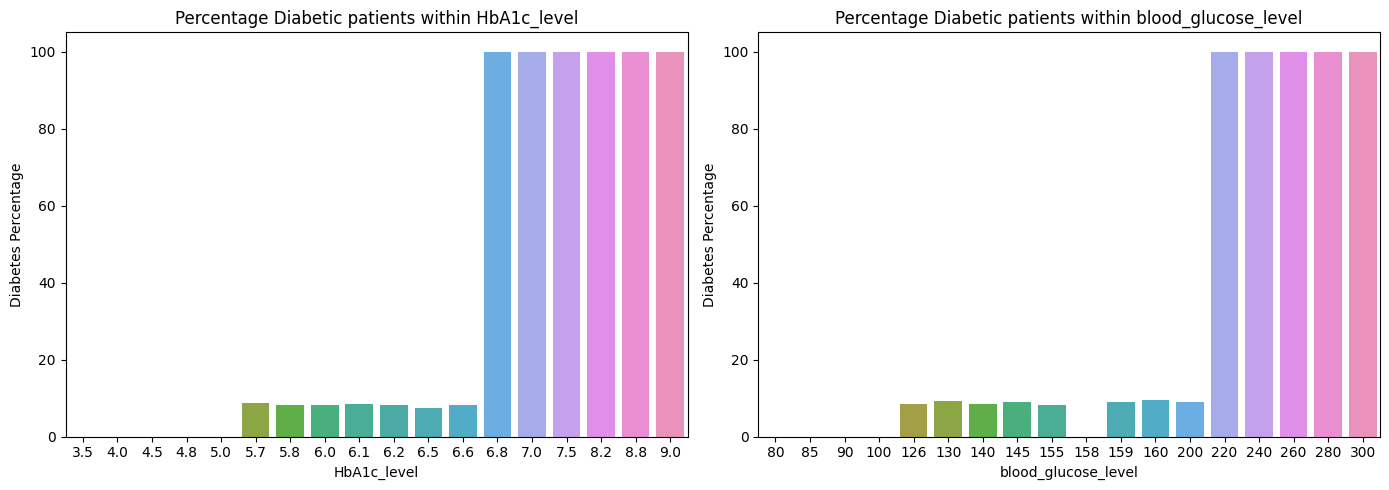

In [ ]:
# Расчет доли больных диабетом для каждого значения лабораторных показателей 
HbA1c_level_percentages = df.groupby('HbA1c_level')['diabetes'].mean() * 100
blood_glucose_level_percentages = df.groupby('blood_glucose_level')['diabetes'].mean() * 100

# визуализация соотношения признаков пациентов с установленным диагнозом диабета
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# 1. Распределение в зависимости от HbA1c_level
sns.barplot(x=HbA1c_level_percentages.index, y=HbA1c_level_percentages.values, ax=axes[0])
axes[0].set_title("Percentage Diabetic patients within HbA1c_level")
axes[0].set_xlabel("HbA1c_level")
axes[0].set_ylabel("Diabetes Percentage")

# 2. Распределение в зависимости от blood_glucose_level
sns.barplot(x=blood_glucose_level_percentages.index, y=blood_glucose_level_percentages.values, ax=axes[1])
axes[1].set_title("Percentage Diabetic patients within blood_glucose_level")
axes[1].set_xlabel("blood_glucose_level")
axes[1].set_ylabel("Diabetes Percentage")

plt.tight_layout()
plt.show()

1. Для показателей уровня  гликированного гемоглобина 5.7 - 6.6 ммоль/л, уровня глюкозы крови 126 - 200 процент больных сахарным диабетом состоявляет около 10-15%.
2.  Для показателей уровня гликированного гемоглобина выше 6,8 ммоль/л, уровня глюкозы крови 220 процент больных сахарным диабетом состоявляет около 100%.

**Создание признаков (Feature Engineering)**

1. HbA1c_level и diabetes :-

Гликированный гемоглобин, или гликогемоглобин (кратко обозначается: гемоглобин A1c, HbA1c), — биохимический показатель крови, отражающий среднее содержание сахара в крови за длительный период (от трёх до четырёх месяцев), в отличие от измерения глюкозы крови, которое дает представление об уровне глюкозы крови только на момент исследования.

Создание нового признака на основе интерпретации уровня гликированного гемоглобина:
    
> '< 5.7	Normal',

> '5.7 – 6.4	Prediabetes',

> '>= 6.5	Diabetes'


Источник:
https://www.cdc.gov/diabetes/managing/managing-blood-sugar/a1c.html

In [ ]:
diagnosing = []
for value in df['HbA1c_level']:
    if value < 5.7:
        diagnosing.append('normal')
        
    elif (5.7 <= value) and (value <= 6.4):
        diagnosing.append('prediabetes')
        
    elif (value >= 6.5):
        diagnosing.append('diabetes')
        
df['interpretation_of_HbA1c_level'] = diagnosing  

In [ ]:
df[df['interpretation_of_HbA1c_level'] == 'prediabetes']['diabetes'].value_counts()

diabetes
0    36428
1     3294
Name: count, dtype: int64

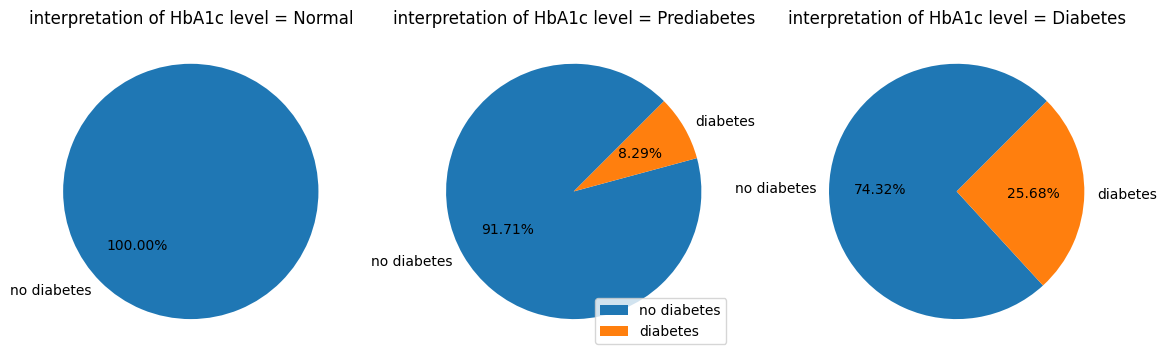

In [ ]:
# визуализация доли пациентов с диагнозом "сахарный диабет" в каждой категории 

plt.figure(figsize = [14,8]);

plt.subplot(1,3,1);
plt.pie(df[df['interpretation_of_HbA1c_level'] == 'normal']['diabetes'].value_counts().values, labels = ['no diabetes'],
        autopct='%1.2f%%',startangle = 45);
plt.title('interpretation of HbA1c level = Normal');

plt.subplot(1,3,2);
plt.pie(df[df['interpretation_of_HbA1c_level'] == 'prediabetes']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('interpretation of HbA1c level = Prediabetes');
plt.legend();

plt.subplot(1,3,3);
plt.pie(df[df['interpretation_of_HbA1c_level'] == 'diabetes']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%', startangle = 45);
plt.title('interpretation of HbA1c level = Diabetes');

По графикам видно, что доля пациентов с сахарным диабетом отсутвуется в группе с нормальным уровнем гликированного гемглобина, увеличивается до 8,29% в группе "Предиабет" и достигает 25,68% в группе "Диабет". Следовательно, количество пациентов диабетом возрастает с увеличением уровня гликированного гемглобина.

2. bmi и diabetes 

Индекс массы тела (ИМТ, англ. body mass index (BMI)) — величина, позволяющая оценить степень соответствия массы человека и его роста и тем самым косвенно судить о том, является ли масса недостаточной, нормальной или избыточной.

BMI - Weight Status
> '=< 18.5 - Underweight'

> '18.5 – 24.9 - Normal'

> '25 – 29.9 - Overweight'

> '>= 30 - Obesity'

Источник:
1. https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html
2. https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D0%BC%D0%B0%D1%81%D1%81%D1%8B_%D1%82%D0%B5%D0%BB%D0%B0

In [ ]:
weight_status = []

for value in df['bmi']:
    if value <= 18.5:
        weight_status.append('underweight')
        
    elif (18.5 < value) and (value <= 24.9):
        weight_status.append('normal')
        
    elif (24.9 < value) and (value <= 29.9):
        weight_status.append('overweight')
        
    elif (value > 29.9):
        weight_status.append('obesity')
        
df['weight_status'] = weight_status

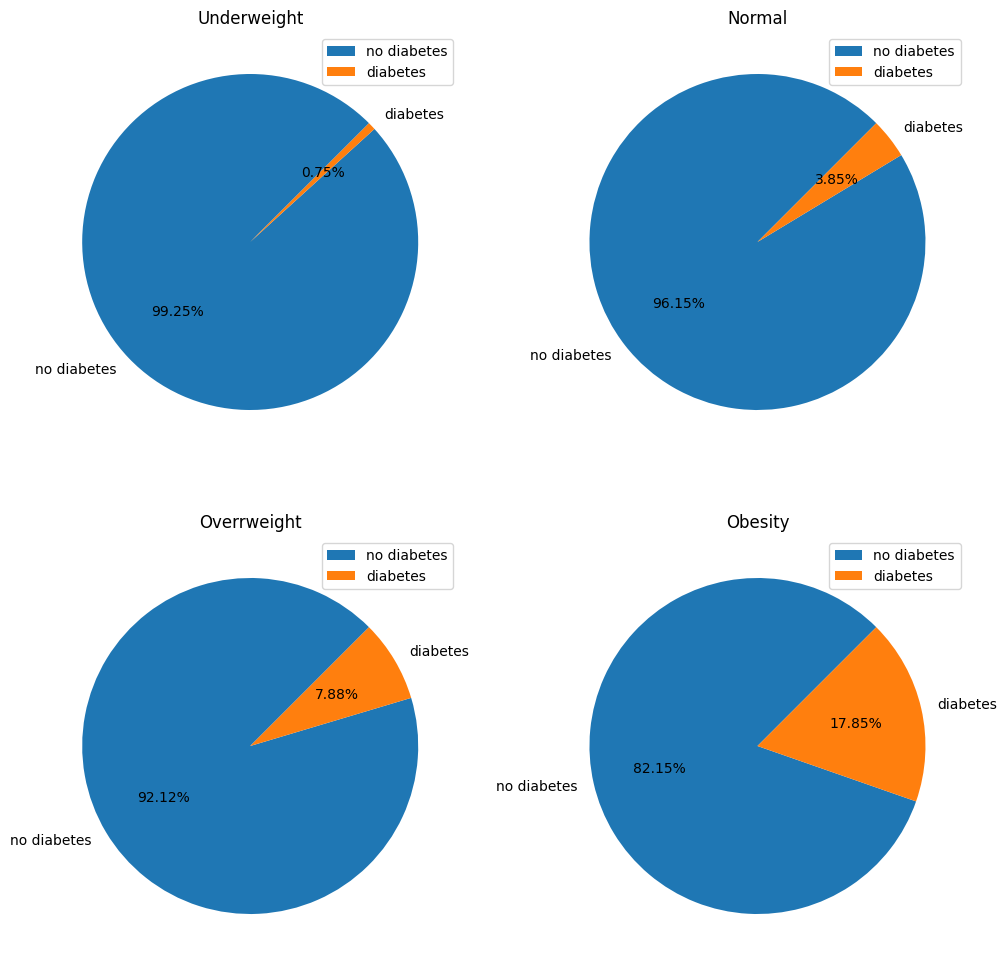

In [ ]:
# визуализация доли пациентов с диагнозом "сахарный диабет" в каждой категории 

plt.figure(figsize = [12,12]);

plt.subplot(2,2,1);
plt.pie(df[df['weight_status'] == 'underweight']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%', startangle = 45);
plt.title('Underweight')
plt.legend();

plt.subplot(2,2,2);
plt.pie(df[df['weight_status'] == 'normal']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('Normal')
plt.legend();

plt.subplot(2,2,3);
plt.pie(df[df['weight_status'] == 'overweight']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('Overrweight')
plt.legend();

plt.subplot(2,2,4);
plt.pie(df[df['weight_status'] == 'obesity']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('Obesity')
plt.legend();

Доля пациентов с сахарным диабетом возрастает с увеличением индекса массы тела

3. blood_glucose_level и diabetes.

В описании к датасету нет информации какой конкретно тест на уровень глюкозы крови проводился. Судя по распределению значений, а также ответу DATASET CREATOR скорее всего проводилось взятие крови не натощак.

Random Blood Sugar Test - произвольно взятый анализ крови на сахар; Уровень глюкозы в крови на момент измерения (без соблюдения стандартных условий перед измерением уровня глюкозы (8 ми часового голода):  Концентрация от 200 mg/dL и более говорит о вероятном наличии сахарного диабета.

blood_glucose_level - Result
> '< 200 - N/A (не интерпретируется)'

> '>= 200 - Diabetes'

Источник:
https://www.cdc.gov/diabetes/basics/getting-tested.html

https://www.multitran.com/ru/dictionary/english-russian/random%20blood%20sugar

In [ ]:
sugar_test = []

for value in df['blood_glucose_level']:
    if value < 200:
        sugar_test.append('N/A')
     
    elif (value >= 200):
        sugar_test.append('diabetes')
        
df['random_sugar_test_result'] = sugar_test

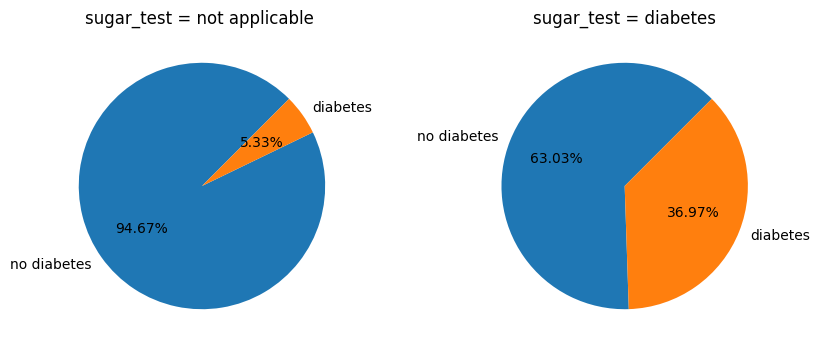

In [ ]:
# визуализация доли пациентов с диагнозом "сахарный диабет" в каждой категории 

plt.figure(figsize = [10,4]);

plt.subplot(1,2,1);
plt.pie(df[df['random_sugar_test_result'] == 'N/A']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
        autopct='%1.2f%%',startangle = 45);
plt.title('sugar_test = not applicable ');

plt.subplot(1,2,2);
plt.pie(df[df['random_sugar_test_result'] == 'diabetes']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('sugar_test = diabetes');




Доля пациентов в группе с уровнем сахара крови >= 200 mg/dL значительно выше (36.97% против 5,33%)

In [ ]:
df.head(35)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,interpretation_of_HbA1c_level,weight_status,random_sugar_test_result
0,Female,80.0,0,1,25.19,6.6,140,0,diabetes,overweight,N/A
1,Female,54.0,0,0,27.32,6.6,80,0,diabetes,overweight,N/A
2,Male,28.0,0,0,27.32,5.7,158,0,prediabetes,overweight,N/A
3,Female,36.0,0,0,23.45,5.0,155,0,normal,normal,N/A
4,Male,76.0,1,1,20.14,4.8,155,0,normal,normal,N/A
5,Female,20.0,0,0,27.32,6.6,85,0,diabetes,overweight,N/A
6,Female,44.0,0,0,19.31,6.5,200,1,diabetes,normal,diabetes
7,Female,79.0,0,0,23.86,5.7,85,0,prediabetes,normal,N/A
8,Male,42.0,0,0,33.64,4.8,145,0,normal,obesity,N/A
9,Female,32.0,0,0,27.32,5.0,100,0,normal,overweight,N/A


**Предобработка данных (DATA PREPROCESSING)**

In [ ]:
df_encoded = df.copy()

In [ ]:
#кодирование столбцов 'gender','random_sugar_test_result'

from sklearn.preprocessing import LabelEncoder
 
labelencoder = LabelEncoder()
 
df_encoded['gender'] = labelencoder.fit_transform(df_encoded['gender'])
df_encoded['random_sugar_test_result'] = labelencoder.fit_transform(df_encoded['random_sugar_test_result'])

In [ ]:
#кодирование порядковых категориальных признаков  (при кодировании с помощью OrdinalEncoder логика порядка нарушается)

def return_HbA1c_level(interpretation_of_HbA1c_level: str):
    dictionary = {
        "normal" : 0, 
        "prediabetes" : 1, 
        "diabetes" : 2,
    }
    return dictionary[interpretation_of_HbA1c_level]

def return_weight_status(weight_status: str):
    dictionary = {
        "underweight" : 0, 
        "normal" : 1, 
        "overweight" : 2,
        "obesity" : 3
    }
    return dictionary[weight_status]

df_encoded["interpretation_of_HbA1c_level"] = df_encoded["interpretation_of_HbA1c_level"].map(return_HbA1c_level)
df_encoded["weight_status"] = df_encoded["weight_status"].map(return_weight_status)

In [ ]:
df_encoded.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,interpretation_of_HbA1c_level,weight_status,random_sugar_test_result
0,0,80.0,0,1,25.19,6.6,140,0,2,2,0
1,0,54.0,0,0,27.32,6.6,80,0,2,2,0
2,1,28.0,0,0,27.32,5.7,158,0,1,2,0
3,0,36.0,0,0,23.45,5.0,155,0,0,1,0
4,1,76.0,1,1,20.14,4.8,155,0,0,1,0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96013 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         96013 non-null  int64  
 1   age                            96013 non-null  float64
 2   hypertension                   96013 non-null  int64  
 3   heart_disease                  96013 non-null  int64  
 4   bmi                            96013 non-null  float64
 5   HbA1c_level                    96013 non-null  float64
 6   blood_glucose_level            96013 non-null  int64  
 7   diabetes                       96013 non-null  int64  
 8   interpretation_of_HbA1c_level  96013 non-null  int64  
 9   weight_status                  96013 non-null  int64  
 10  random_sugar_test_result       96013 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 8.8 MB


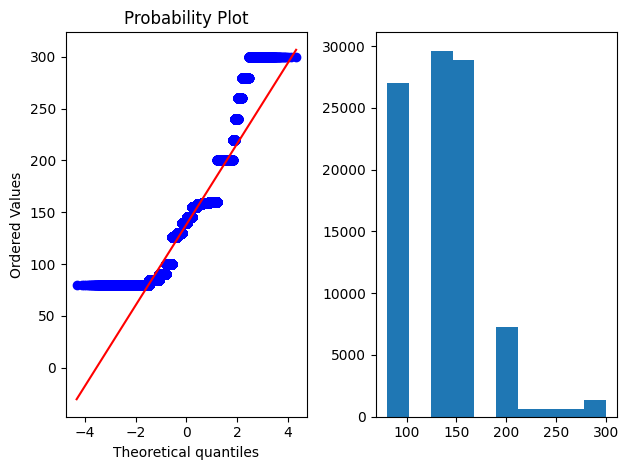

In [ ]:
#проверка данных на нормальность, используя метод визуализации.

import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df_encoded['blood_glucose_level'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df_encoded['blood_glucose_level']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

#распределение ненормально

<Axes: >

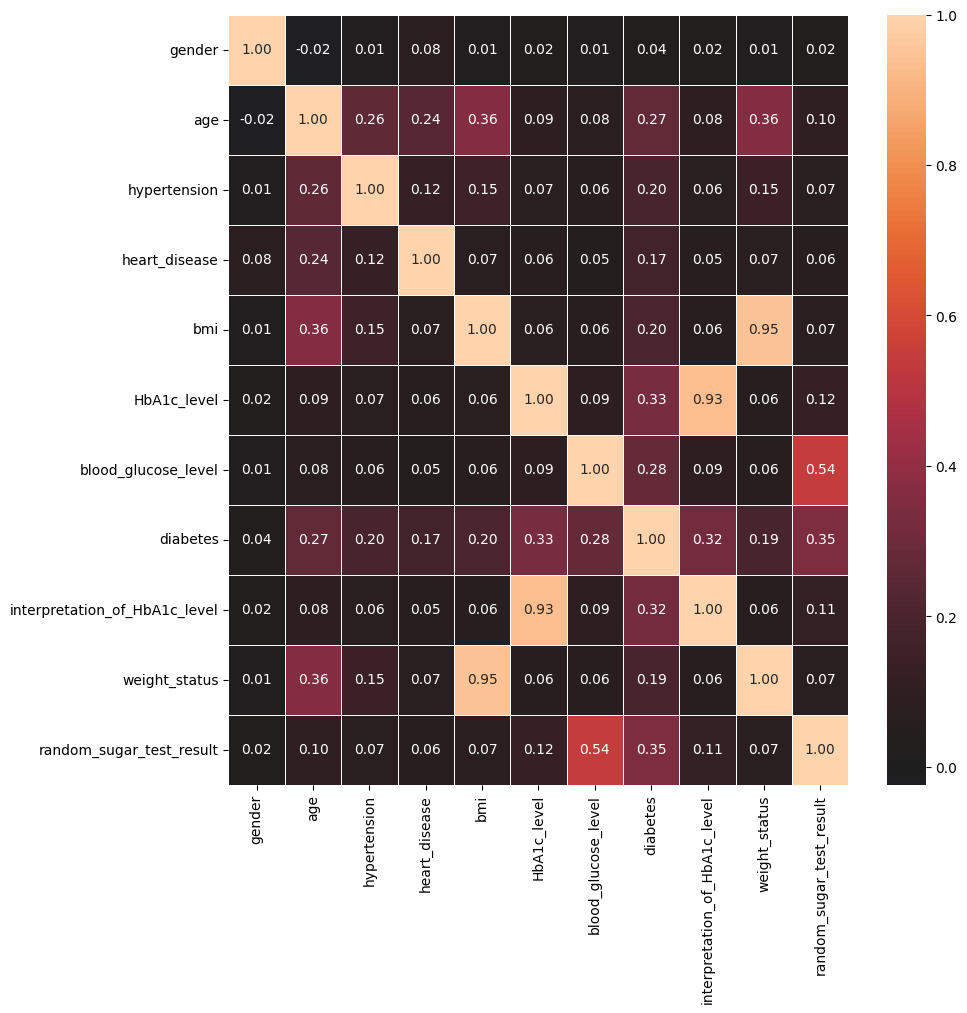

In [ ]:
# оценка данных на предмет наличия мультиколлинеарности. По графикам гистограммы другие признаки также визуально распределены ненормально
plt.figure(figsize=(10,10))  
sns.heatmap(df_encoded.corr(method = 'spearman'),fmt='.2f', annot=True, linewidths=.5, center=0)

In [ ]:
df_encoded.corr(method = 'spearman').abs().unstack().sort_values(ascending=False).drop_duplicates()[0:5]

#имеются 2 пары признаков с высокой корреляцией больше 0.7

gender               gender                           1.000000
weight_status        bmi                              0.948413
HbA1c_level          interpretation_of_HbA1c_level    0.933665
blood_glucose_level  random_sugar_test_result         0.542647
age                  weight_status                    0.361840
dtype: float64

In [ ]:
# оценим мультиколлинеарность и взаимосвязь признаков с целевой переменной.
# ОТВЕТ: мультиколлинеарности с целевой переменной не выявлено

df_encoded.corr(method = 'spearman').abs()['diabetes'].sort_values(ascending=False)

diabetes                         1.000000
random_sugar_test_result         0.349067
HbA1c_level                      0.333808
interpretation_of_HbA1c_level    0.316793
blood_glucose_level              0.278446
age                              0.269012
bmi                              0.201962
hypertension                     0.195523
weight_status                    0.193142
heart_disease                    0.170774
gender                           0.038327
Name: diabetes, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

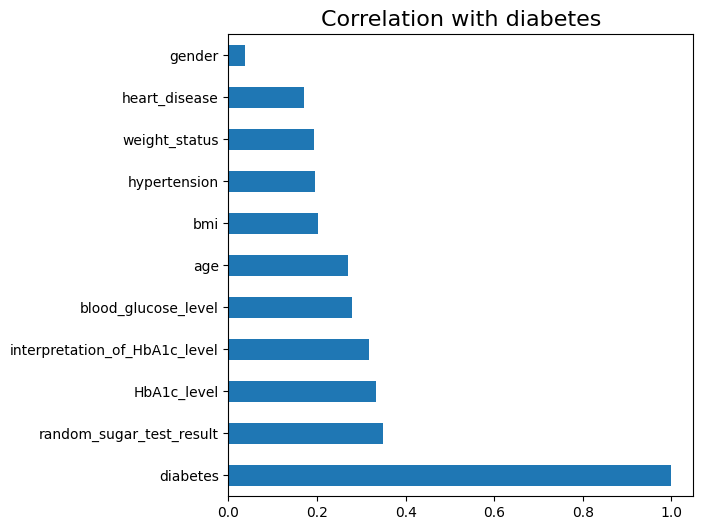

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
df_encoded.corr(method = 'spearman').abs()['diabetes'].sort_values(ascending=False).plot.barh(ax=ax)
plt.title('Correlation with diabetes', fontsize = 16)
plt.show

In [ ]:
# Нормализация числовых признаков
from sklearn import preprocessing

columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = preprocessing.RobustScaler()
df_encoded[columns] = scaler.fit_transform(df_encoded[columns])
df_encoded.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,interpretation_of_HbA1c_level,weight_status,random_sugar_test_result
0,0,1.057143,0,1,-0.331260,0.571429,0.000000,0,2,2,0
1,0,0.314286,0,0,0.000000,0.571429,-1.016949,0,2,2,0
2,1,-0.428571,0,0,0.000000,-0.071429,0.305085,0,1,2,0
3,0,-0.200000,0,0,-0.601866,-0.571429,0.254237,0,0,1,0
4,1,0.942857,1,1,-1.116641,-0.714286,0.254237,0,0,1,0


**Проверка гипотез**

In [ ]:
#статистические тесты
from scipy.stats import normaltest

# 1. устанавливаем основные параметры, в том числе стандартный размер alpha

H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

alpha = 0.05

_, p = normaltest(df_encoded)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация 

if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.000
Данные не распределены нормально (мы отвергаем H0)


In [ ]:
# 2. Проверяем есть ли связь между двумя категориальными признаками

H0 = 'Заболеваемость диабетом не зависит от пола'
Ha = 'Заболеваемость диабетом зависит от пола'

import scipy.stats as stats

# вычисляем таблицу сопряжённости
table = pd.crosstab(df['diabetes'], df['gender'])

# проводим тест
_, p, _, _ = stats.chi2_contingency(table)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [ ]:
H0 = 'Доля мужчин, среди больных сахарным диабетом, равна гипотетической пропорции '
Ha = 'Доля мужчин, среди больных сахарным диабетом, не равна гипотетической пропорции '

p_0 = 0.52
n = len(df_encoded[df_encoded.diabetes == 1])
x = len(df_encoded[(df_encoded.gender == 0)&(df_encoded.diabetes == 1)])

print(n, x)

from statsmodels.stats.proportion import proportions_ztest

#perform one proportion z-test
_, p = proportions_ztest(count=x, nobs=n, value=p_0)

if p < 0.05:
    print("Мы отвергаем нулевую гипотезу")
else:
    print("Мы не можем отвергнуть нулевую гипотезу.")

8445 4419
Мы не можем отвергнуть нулевую гипотезу.


In [ ]:
H0 = 'Заболеваемость диабетом не зависит от пола'
Ha = 'Мужчины чаще болеют сахарным диабетом, чем женщины'


import scipy.stats as stats
from scipy.stats import mannwhitneyu

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
male_data = df_encoded[(df_encoded.gender == 0)&(df_encoded.diabetes == 1)]
female_data = df_encoded[(df_encoded.gender == 1)&(df_encoded.diabetes == 1)]

# Применение критерия Манна-Уитни для ненормально распределеных данных
_, p_value = mannwhitneyu(male_data, female_data)

# Вывод результатов
if p <= 0.05:
    print("Мы отвергаем нулевую гипотезу")
else:
    print("Мы не можем отвергнуть нулевую гипотезу.")

Мы не можем отвергнуть нулевую гипотезу.


In [ ]:
H0 = 'Диагностический для диабета уровень глюкозы крови наблюдается одинаково у мужчин и женщин'
Ha = 'Диагностический для диабета уровень глюкозы крови наблюдается чаще у мужчин, чем у женщин'


import scipy.stats as stats
from scipy.stats import mannwhitneyu

# задаём уровень значимости
alpha = 0.05 

# загружаем данные, уровень диагностический уровень глюкозы устанавливаю >= 220, 
# так как при нем 100% заболеваемость диабетом по имеющимся данным 
male_glucose_data = df.blood_glucose_level[(df.blood_glucose_level >= 220) & (df.gender == 'Male')]
female_glucose_data = df.blood_glucose_level[(df.blood_glucose_level >= 220) & (df.gender == 'Female')]

# Применение критерия Манна-Уитни для ненормально распределеных данных
_, p = mannwhitneyu(male_glucose_data, female_glucose_data, alternative = 'greater')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))



p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: Нет достоверных различий между диагностическим уровнем для диабета уровнем глюкозы крови у мужчин и женщин

In [ ]:
H0 = 'Уровень глюкозы у больных диабетом не отличает от уровня глюкозы здоровых людей'
Ha = 'Уровень глюкозы у больных диабетом выше уровня глюкозы здоровых людей'


import scipy.stats as stats
from scipy.stats import mannwhitneyu

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
diabet_glucose_data = df.blood_glucose_level[df.diabetes == 1]
no_diabet_glucose_data = df.blood_glucose_level[df.diabetes == 0]

# Применение критерия Манна-Уитни для ненормально распределеных данных
_, p_value = mannwhitneyu(diabet_glucose_data, no_diabet_glucose_data, alternative = 'greater')

print('p_value = {:.3f}'.format(p_value))

# интерпретируем результат
if p_value <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))



p_value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [ ]:
H0 = 'Индекс массы тела у больных диабетом не отличает от индекса массы тела здоровых людей'
Ha = 'Индекс массы тела у больных диабетом выше индекса массы тела здоровых людей'


import scipy.stats as stats
from scipy.stats import mannwhitneyu

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
diabet_bmi_data = df.bmi[df.diabetes == 1]
no_diabet_bmi_data = df.bmi[df.diabetes == 0]

# Применение критерия Манна-Уитни для ненормально распределеных данных
_, p_value = mannwhitneyu(diabet_bmi_data, no_diabet_bmi_data, alternative = 'greater')

print('p_value = {:.3f}'.format(p_value))

# интерпретируем результат
if p_value <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))



p_value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: Индекс массы тела у пациентов с сахарным диабетом выше, чем у пациентов без диабета

In [ ]:
H0 = 'Возраст больных диабетом не отличается от возраста здоровых людей'
Ha = 'Возраст больных диабетом старше возраста здоровых людей'


import scipy.stats as stats
from scipy.stats import mannwhitneyu

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
diabet_age_data = df.age[df.diabetes == 1]
no_diabet_age_data = df.age[df.diabetes == 0]

# Применение критерия Манна-Уитни для ненормально распределеных данных
_, p_value = mannwhitneyu(diabet_age_data, no_diabet_age_data, alternative = 'greater')

print('p_value = {:.3f}'.format(p_value))

# интерпретируем результат
if p_value <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))



p_value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: Возраст больных диабетом старше возраста здоровых людей

**Машинное обучение (MODELLING)**

In [ ]:
#выделение целевого признака
X = df_encoded.drop('diabetes', axis = 1)
y = df_encoded.diabetes

In [ ]:
#стратифицированное разделение выборки на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((76810, 10), (76810,), (19203, 10), (19203,))

In [ ]:
y_test.value_counts()

diabetes
0    17514
1     1689
Name: count, dtype: int64

In [ ]:
y_train.value_counts()

diabetes
0    70054
1     6756
Name: count, dtype: int64

классы не сбалансированы

In [ ]:
#отбор наиболее информативных признаков.

#Тестировала на 5, 8, 10 признаках. На полном наборе призанков метрики выше. 
#Поэтому пропускаю этот этап.

#from sklearn.feature_selection import SelectKBest, f_regression, f_classif
#selector = SelectKBest(score_func = f_classif, k = 8)
#selector.fit(X_train, y_train)
 
#selector.get_feature_names_out()

In [ ]:
#df = df_encoded[['age', 'hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level',
       #'interpretation_of_HbA1c_level', 'weight_status',
       #'random_sugar_test_result','diabetes']]

#X = df.drop('diabetes', axis = 1)
#y = df.diabetes
#X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size = 0.2, random_state = 42)
#X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76810 entries, 1713 to 12128
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         76810 non-null  int64  
 1   age                            76810 non-null  float64
 2   hypertension                   76810 non-null  int64  
 3   heart_disease                  76810 non-null  int64  
 4   bmi                            76810 non-null  float64
 5   HbA1c_level                    76810 non-null  float64
 6   blood_glucose_level            76810 non-null  float64
 7   interpretation_of_HbA1c_level  76810 non-null  int64  
 8   weight_status                  76810 non-null  int64  
 9   random_sugar_test_result       76810 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 6.4 MB


Сэмплирование для коррекции дисбаланса классов

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'auto', random_state = 42)
X_train_resampled, y_train_resampled =smote.fit_resample(X_train, y_train)

In [ ]:
y_train_resampled.value_counts()

diabetes
0    70054
1    70054
Name: count, dtype: int64

In [ ]:
#обучение 5 моделей для задачи классификации, вывод метрик и матрицы корреляции

classifiers = [
    ("Logistic Regression", LogisticRegression(random_state = 42)),
    ("Decision Tree", DecisionTreeClassifier(random_state = 42)),
    ("Random Forest", RandomForestClassifier(random_state = 42)),
    ("GradientBoosting", GradientBoostingClassifier(random_state = 42)),
    ("CatBoost", CatBoostClassifier(verbose=False, random_state = 42))
]

# Iterate through classifiers, fit, and evaluate them
for name, classifier in classifiers:
    classifier.fit(X_train_resampled, y_train_resampled)
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}") 
    
    # Display classification report
    report = classification_report(y_test, y_pred)
    print(f"Classification Report:\n{report}")
    
    # Display roc_auc
    roc_auc = roc_auc_score(y_test, y_pred).round(3)
    print("ROC-AUC на тестовой выборке:", roc_auc_score(y_test, y_pred).round(3)) 
    
    # Display confusion matrix
    confusion = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{confusion}")
    print("=" * 50)

Model: Logistic Regression
Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     17514
           1       0.44      0.88      0.58      1689

    accuracy                           0.89     19203
   macro avg       0.71      0.89      0.76     19203
weighted avg       0.94      0.89      0.91     19203

ROC-AUC на тестовой выборке: 0.885
Confusion Matrix:
[[15593  1921]
 [  202  1487]]
Model: Decision Tree
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17514
           1       0.71      0.73      0.72      1689

    accuracy                           0.95     19203
   macro avg       0.84      0.85      0.85     19203
weighted avg       0.95      0.95      0.95     19203

ROC-AUC на тестовой выборке: 0.853
Confusion Matrix:
[[17019   495]
 [  448  1241]]
Model: Random Forest
Accuracy: 0.96
Classification Rep

Метрика для оценки качества моделирования - F1 - score. Поскольку нам важно предсказывать оба класса. Однако предсказать класс 1, всё же важнее. Соответственно, важно уменьшить ошибку 2 рода (предсказать, что человек здоров, когда на самом деле он болен (FN). Поэтому также обращаю внимание на метрику recall класса 1 и FN в матрице.

F1-score самый высокий показывает CatBoost, на втором месте GradientBoosting и Random Forest.
Но метрика recall класса один выше у GradientBoosting.

Далее произвела подбор параметров для 3х моделей с помощью optuna.
В результате длительных вычислений параметров для метрики F1-score, улучшить метрику более 0,8 не удалось. 
Для GradientBoosting метрики сравнялись с первым запуском CatBoost(со стандарными настройками). Время для поиска наилучших параметров для GB было затрачено очень много. 

Далее пробую запустить optuna для CB для увеличения метрики recall,что тоже не несет успеха. Значения практически меняются.

Следующий шаг - подбор оптимального порога вероятности. При пороге вероятности 0,25 для увеличения метрики recall, модели GB и CB показывает равные результаты.



In [ ]:
#import optuna
#print("Версия Optuna: {}".format(optuna.__version__))

In [ ]:
from sklearn import metrics 

In [ ]:
#поиск лучших гиперпараметров для RandomForestClassifier

#def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  #n_estimators = trial.suggest_int('n_estimators', 100, 200, 1);
  #max_depth = trial.suggest_int('max_depth', 10, 30, 1);
  #min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  #model = RandomForestClassifier(n_estimators=n_estimators,
                                          #max_depth=max_depth,
                                          #min_samples_leaf=min_samples_leaf,
                                          #random_state=42)
  # обучаем модель
  #model.fit(X_train_resampled, y_train_resampled)
  #score = metrics.recall_score(y_train_resampled, model.predict(X_train_resampled))

  #return score
  
  # cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
#study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
#study.optimize(optuna_rf, n_trials=10)

# выводим результаты на обучающей выборке
#print("Наилучшие значения гиперпараметров {}".format(study.best_params))
#print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))



In [ ]:
# рассчитаем точность для тестовой выборки
#model = RandomForestClassifier(**study.best_params,random_state=42, )
#model.fit(X_train_resampled, y_train_resampled)
#y_train_pred = model.predict(X_train_resampled)
#y_test_pred = model.predict(X_test)
#report = classification_report(y_test, y_test_pred)
#print(f"Classification Report:\n{report}")



In [ ]:
# обучение модели RandomForestClassifier с подобранными гиперпараметрами

#Создаём объект класса случайный лес
rf_clf = RandomForestClassifier(
    n_estimators = 170,
    criterion = 'gini',
    min_samples_leaf = 2,
    max_depth = 30,
    random_state = 42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf.fit(X_train_resampled, y_train_resampled)

#Делаем предсказание класса
y_test_pred = rf_clf.predict(X_test)
#Выводим отчёт о метриках
report = classification_report(y_test, y_test_pred)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17514
           1       0.79      0.75      0.77      1689

    accuracy                           0.96     19203
   macro avg       0.88      0.86      0.87     19203
weighted avg       0.96      0.96      0.96     19203



In [ ]:
#optuna.visualization.is_available()
#optuna.visualization.plot_optimization_history(study, target_name="f1_score")
#optuna.visualization.plot_contour(study, params=["max_depth", "n_estimators"],
                                  #target_name="f1_score")

In [ ]:
#поиск лучших гиперпараметров для GradientBoostingClassifier

#def optuna_gb(trial):
  # задаем пространства поиска гиперпараметров
  #n_estimators = trial.suggest_int('n_estimators', 250, 400);
  #max_depth = trial.suggest_int('max_depth', 5, 12);
  #min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1);
  #learning_rate = trial.suggest_float('learning_rate', 0.01, 0.06)
              
  # создаем модель
  #model = GradientBoostingClassifier(n_estimators=n_estimators,
                                          #max_depth=max_depth,
                                          #min_samples_leaf=min_samples_leaf,
                                          #learning_rate = learning_rate,
                                          #random_state=42)
  # обучаем модель
  #model.fit(X_train_resampled, y_train_resampled)
  #score = metrics.recall_score(y_train_resampled, model.predict(X_train_resampled))

  #return score
  
  # cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
#study = optuna.create_study(study_name="GradientBoostingClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
#study.optimize(optuna_gb, n_trials=10)

# выводим результаты на обучающей выборке
#print("Наилучшие значения гиперпараметров {}".format(study.best_params))
#print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))



In [ ]:
# рассчитаем точность для тестовой выборки
#model = GradientBoostingClassifier(**study.best_params,random_state=42, )
#model.fit(X_train_resampled, y_train_resampled)
#y_train_pred = model.predict(X_train_resampled)
#y_test_pred = model.predict(X_test)
#report = classification_report(y_test, y_test_pred)
#print(f"Classification Report:\n{report}")

In [ ]:
%%time
start_time = time.time()

# обучение модели GradientBoostingClassifier с подобранными гиперпараметрами

gb_clf = GradientBoostingClassifier(
    learning_rate = 0.064,
    n_estimators = 312,
    min_samples_leaf = 5,
    max_depth = 10,
    random_state = 42 #генератор случайных чисел
)

#Обучаем модель 
gb_clf.fit(X_train_resampled, y_train_resampled)

#Делаем предсказание класса
y_test_pred = gb_clf.predict(X_test)

#Рассчет затраченного времени
end_time = time.time()
training_time = end_time - start_time

#Выводим отчёт о метриках
report = classification_report(y_test, y_test_pred)
print(f"Classification Report:\n{report}")
# Display roc_auc
roc_auc = roc_auc_score(y_test, y_test_pred).round(3)
print("ROC-AUC на тестовой выборке:", roc_auc_score(y_test, y_test_pred).round(3)) 
    
# Display confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print(f"Confusion Matrix:\n{confusion}")
print("=" * 50)
print('Training time = ', training_time)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17514
           1       0.90      0.71      0.79      1689

    accuracy                           0.97     19203
   macro avg       0.94      0.85      0.89     19203
weighted avg       0.97      0.97      0.97     19203

ROC-AUC на тестовой выборке: 0.85
Confusion Matrix:
[[17378   136]
 [  493  1196]]
Training time =  207.354998588562
CPU times: user 3min 27s, sys: 38 ms, total: 3min 27s
Wall time: 3min 27s


In [ ]:
#Считаем вероятности наличия диабета для каждого из пациентов
#Нас интересует только вероятность класса (второй столбец)
y_proba_pred = gb_clf.predict_proba(X_test)[:, 1]
#Для удобства завернём numpy-массив в pandas Series
y_proba_pred = pd.Series(y_proba_pred)
#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #Пациентов, для которых вероятность наличия диабета > threshold относим к классу 1
    #В противном случае — к классу 0
    y_pred = y_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y_test, y_pred))
    precision_scores.append(metrics.precision_score(y_test, y_pred))
    f1_scores.append(metrics.f1_score(y_test, y_pred))

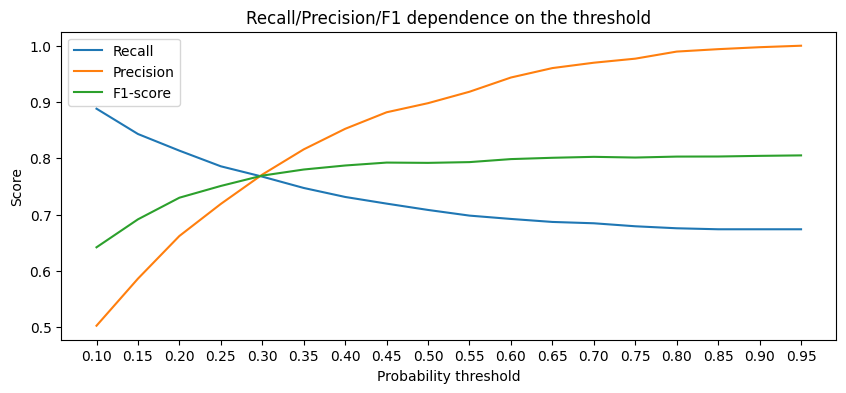

In [ ]:
#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')
#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')

#Даём названия графику и осям
ax.set_title('Recall/Precision/F1 dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds) 
#Отображаем легенду
ax.legend();

In [ ]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.25
#Пациентов, для которых вероятность наличия диабета > 0.4, относим к классу 1
#В противном случае — к классу 0
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y_test, y_pred_opt))

# Display roc_auc
roc_auc = roc_auc_score(y_test, y_pred_opt).round(3)
print("ROC-AUC на тестовой выборке:", roc_auc_score(y_test, y_test_pred).round(3)) 
    
# Display confusion matrix
confusion = confusion_matrix(y_test, y_pred_opt)
print(f"Confusion Matrix:\n{confusion}")
print("=" * 50)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     17514
           1       0.72      0.79      0.75      1689

    accuracy                           0.95     19203
   macro avg       0.85      0.88      0.86     19203
weighted avg       0.96      0.95      0.96     19203

ROC-AUC на тестовой выборке: 0.85
Confusion Matrix:
[[16995   519]
 [  362  1327]]


Best threshold = 0.96, F1-Score = 0.81


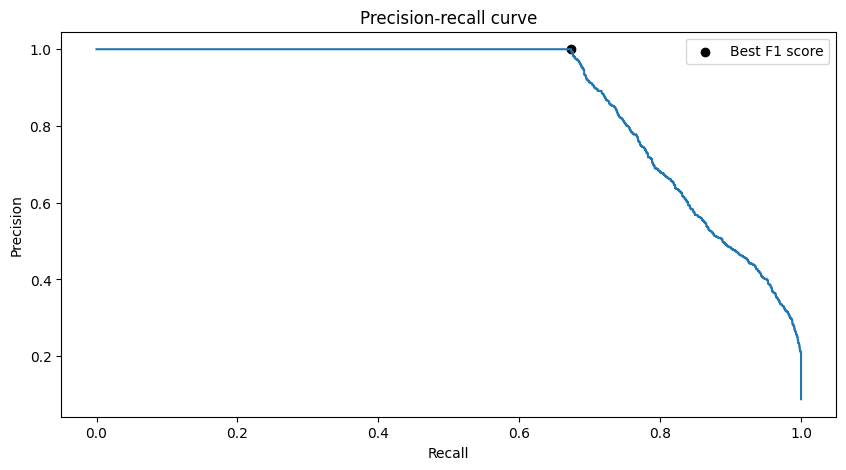

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Получение предсказанных вероятностей или меток классов для модели на тестовых данных
y_pred_proba = gb_clf.predict_proba(X_test)[:, 1]

#Вычисляем координаты PR-кривой
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
#Вычисляем F1-score при различных threshold
f1_scores = (2 * precision * recall) / (precision + recall)
#Определяем индекс максимума F1
idx = np.argmax(f1_scores)
print('Best threshold = {:.2f}, F1-Score = {:.2f}'.format(thresholds[idx], f1_scores[idx]))

#Строим PR-кривую
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
#Строим линейный график зависимости precision от recall
ax.plot(recall, precision)
#Отмечаем точку максимума F1
ax.scatter(recall[idx], precision[idx], marker='o', color='black', label='Best F1 score')
#Даём название графику и подписи осям
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
#Отображаем легенду
ax.legend();

In [ ]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.25
#Пациентов, для которых вероятность наличия диабета > 0.4, относим к классу 1
#В противном случае — к классу 0
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y_test, y_pred_opt))

# Display roc_auc
roc_auc = roc_auc_score(y_test, y_pred_opt).round(3)
print("ROC-AUC на тестовой выборке:", roc_auc_score(y_test, y_test_pred).round(3)) 
    
# Display confusion matrix
confusion = confusion_matrix(y_test, y_pred_opt)
print(f"Confusion Matrix:\n{confusion}")
print("=" * 50)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     17514
           1       0.72      0.79      0.75      1689

    accuracy                           0.95     19203
   macro avg       0.85      0.88      0.86     19203
weighted avg       0.96      0.95      0.96     19203

ROC-AUC на тестовой выборке: 0.85
Confusion Matrix:
[[16995   519]
 [  362  1327]]


In [ ]:
%%time
start_time = time.time()



cb_clf = CatBoostClassifier(
    verbose=False,
    random_state = 42 #генератор случайных чисел
)
#Обучаем модель 
cb_clf.fit(X_train_resampled, y_train_resampled)

#Делаем предсказание класса
y_test_pred = cb_clf.predict(X_test)

#Рассчет затраченного времени
end_time = time.time()
training_time = end_time - start_time

#Выводим отчёт о метриках
report = classification_report(y_test, y_test_pred)
print(f"Classification Report:\n{report}")

# Display roc_auc
roc_auc = roc_auc_score(y_test, y_test_pred).round(3)
print("ROC-AUC на тестовой выборке:", roc_auc_score(y_test, y_test_pred).round(3)) 
    
# Display confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print(f"Confusion Matrix:\n{confusion}")
print("=" * 50)

print('Training time = ', training_time)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17514
           1       0.94      0.70      0.80      1689

    accuracy                           0.97     19203
   macro avg       0.96      0.85      0.89     19203
weighted avg       0.97      0.97      0.97     19203

ROC-AUC на тестовой выборке: 0.848
Confusion Matrix:
[[17438    76]
 [  507  1182]]
Training time =  21.42590355873108
CPU times: user 1min 15s, sys: 4.55 s, total: 1min 20s
Wall time: 21.5 s


Best threshold = 0.61, F1-Score = 0.81


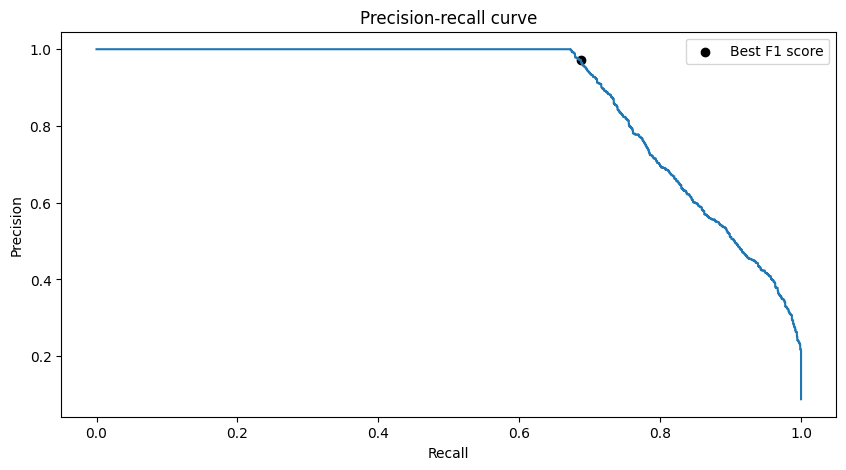

In [ ]:
# Получение предсказанных вероятностей или меток классов для модели на тестовых данных
y_pred_proba = cb_clf.predict_proba(X_test)[:, 1]

#Вычисляем координаты PR-кривой
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
#Вычисляем F1-score при различных threshold
f1_scores = (2 * precision * recall) / (precision + recall)
#Определяем индекс максимума F1
idx = np.argmax(f1_scores)
print('Best threshold = {:.2f}, F1-Score = {:.2f}'.format(thresholds[idx], f1_scores[idx]))

#Строим PR-кривую
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
#Строим линейный график зависимости precision от recall
ax.plot(recall, precision)
#Отмечаем точку максимума F1
ax.scatter(recall[idx], precision[idx], marker='o', color='black', label='Best F1 score')
#Даём название графику и подписи осям
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
#Отображаем легенду
ax.legend();

In [ ]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.45
#Пациентов, для которых вероятность наличия диабета > 0.4, относим к классу 1
#В противном случае — к классу 0
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y_test, y_pred_opt))

# Display roc_auc
roc_auc = roc_auc_score(y_test, y_pred_opt).round(3)
print("ROC-AUC на тестовой выборке:", roc_auc_score(y_test, y_test_pred).round(3)) 
    
# Display confusion matrix
confusion = confusion_matrix(y_test, y_pred_opt)
print(f"Confusion Matrix:\n{confusion}")
print("=" * 50)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17514
           1       0.88      0.72      0.79      1689

    accuracy                           0.97     19203
   macro avg       0.93      0.86      0.89     19203
weighted avg       0.97      0.97      0.97     19203

ROC-AUC на тестовой выборке: 0.848
Confusion Matrix:
[[17351   163]
 [  474  1215]]


In [ ]:
#поиск лучших гиперпараметров для GradientBoostingClassifier

#def optuna_ct(trial):
  # задаем пространства поиска гиперпараметров
  #iterations = trial.suggest_int('iterations', 100, 1000);
  #depth = trial.suggest_int('depth', 3, 10);
  #learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)
              
  # создаем модель
  #model = CatBoostClassifier(iterations=iterations,
                                          #depth=depth,
                                          #learning_rate = learning_rate,
                                          #verbose=False,
                                          #random_state=42)
  # обучаем модель
  #model.fit(X_train_resampled, y_train_resampled)
  #score = metrics.recall_score(y_train_resampled, model.predict(X_train_resampled))

  #return score
  
  # cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
#study = optuna.create_study(study_name="CatBoostClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
#study.optimize(optuna_ct, n_trials=10)

# выводим результаты на обучающей выборке
#print("Наилучшие значения гиперпараметров {}".format(study.best_params))
#print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))



In [ ]:
# рассчитаем точность для тестовой выборки
#model = CatBoostClassifier(**study.best_params,random_state=42, verbose=False)
#model.fit(X_train_resampled, y_train_resampled)
#y_train_pred = model.predict(X_train_resampled)
#y_test_pred = model.predict(X_test)
#report = classification_report(y_test, y_test_pred)
#print(f"Classification Report:\n{report}")
# выводим результаты на обучающей выборке


In [ ]:
# обучаение с найденными гиперпаратрами. Метрику улчшить не удалось. Останавливаюсь на модели со стандартными настройками

cb_clf = CatBoostClassifier(
    iterations=812, 
    learning_rate=0.096, 
    depth=9,
    verbose=False,
    random_state = 42 #генератор случайных чисел
)
#Обучаем модель 
cb_clf.fit(X_train_resampled, y_train_resampled)

#Делаем предсказание класса
y_test_pred = cb_clf.predict(X_test)
#Выводим отчёт о метриках
report = classification_report(y_test, y_test_pred)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17514
           1       0.90      0.71      0.79      1689

    accuracy                           0.97     19203
   macro avg       0.93      0.85      0.89     19203
weighted avg       0.97      0.97      0.97     19203



## Анализ важности признаков ##

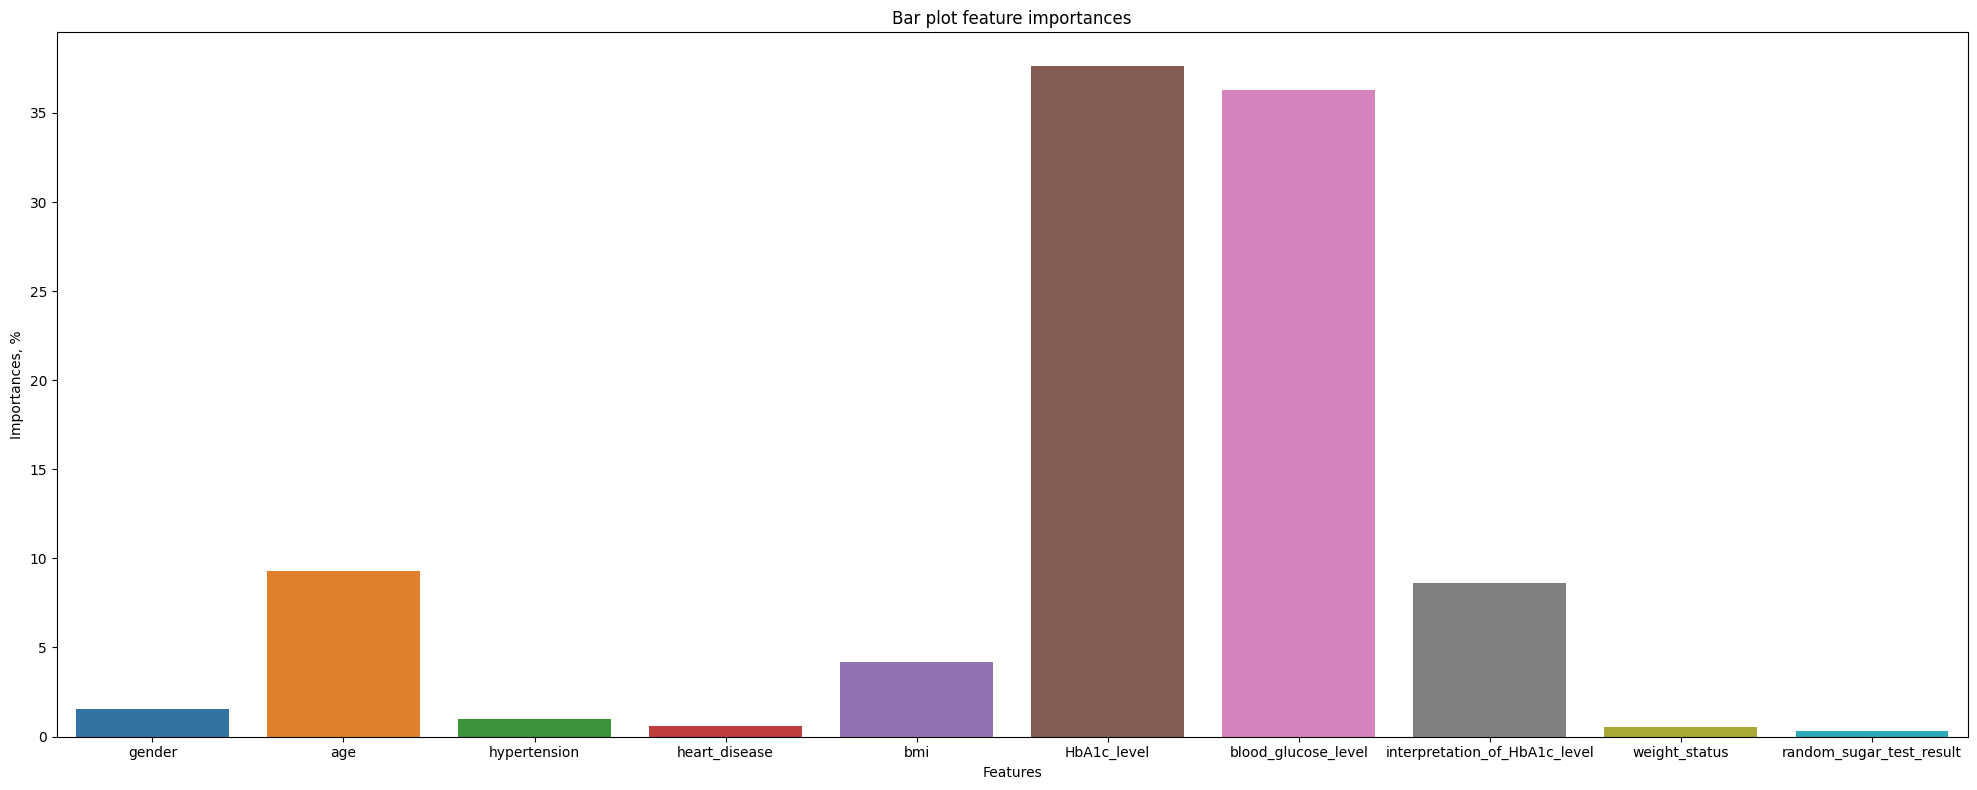

In [ ]:
# визуализация признаков, дающих наибольший вклад.

fig, ax = plt.subplots(figsize=(20, 8)) #фигура + координатная плоскость
feature =  X.columns #признаки
feature_importances = cb_clf.get_feature_importance() #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax);
#Добавляем подпись графику, осям абцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances, %');
fig.tight_layout()

In [ ]:
import shap


# Инициализация объекта explainer SHAP
explainer = shap.Explainer(cb_clf)

# Вычисление значений SHAP для набора данных
shap_values = explainer(X)

In [ ]:
explainer = shap.Explainer(cb_clf, X_test)

In [ ]:
shap_values = explainer(X_test)

100%|===================| 19202/19203 [43:03<00:00]        

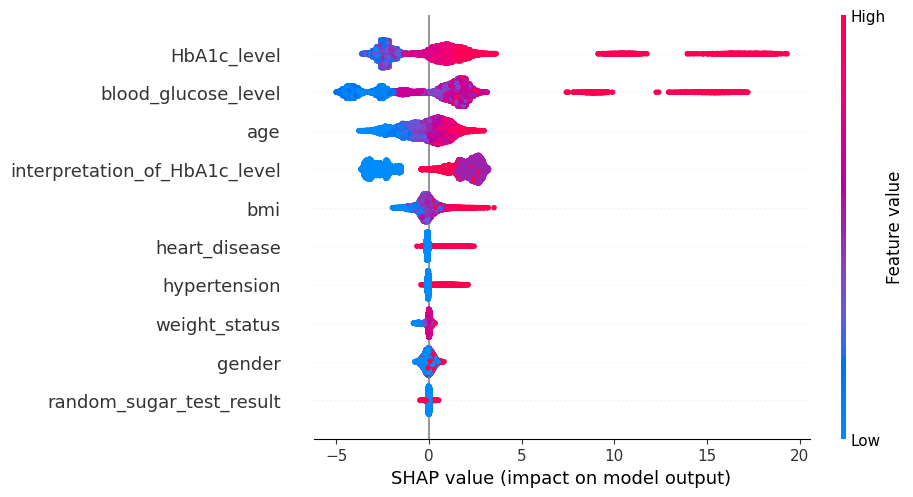

In [ ]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))

In [ ]:
X.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'interpretation_of_HbA1c_level', 'weight_status',
       'random_sugar_test_result'],
      dtype='object')

Наиболее важные признаки для модели: 
1. 'HbA1c_level', 
2. 'blood_glucose_level'
3. 'age'
4. 'interpretation_of_HbA1c_level'
5. 'bmi'

Чем выше значение признаки, тем больше он сдвигается в зону класса 1.

## Вывод: 

- лучшая модель по метрике f1-score GradientBoosting с подобранными настройками параметров или CatBoost(со стандарными настройками) 

- лучшая модель по распознаванию класса 1 - GradientBoosting (со стандартными настройками), однако выдает значительно большее количество FP. Подойдет, если есть цель и возможность дообследовать большее количество пациентов, при этом не упустив действительно больных. 

- CatBoost работает значительно быстрее, а по результатам практически не уступает GradientBoosting. В случае необходимости уменьшить FN, это можно отрегулировать уменьшением порога вероятности. Следовательно, модель выбора - CatBoostClassifier.

In [ ]:
#import pickle
#pickle.dump(model, open("catboost_model.pkl", "wb"))